# Analysis 2

In [1]:
import requests,json,os
import re,datetime
import shutil
import matplotlib.pyplot as mp
import pandas as pd
import numpy as np

In [2]:
#2015/Premier League

In [3]:
df=pd.DataFrame()
for root, dirs, files in os.walk('../data/raw_data'):
    if '/2015/Premier League ' in root:
        if '/Fixtures' in root:        
            for f in files:
                if f.endswith('.json'):
                    if not '.DS_Store' in f:
                        with open(os.path.join(root,f), 'r', encoding='utf-8', errors="ignore") as json_file:
                            data=json.load(json_file)
                            to_ignore = ['odds']
                            data1 = {key: value for (key, value) in data.items() if key.rsplit('_', 1)[-1] not in to_ignore}
                            fix=pd.DataFrame.from_dict(data1, orient='columns', dtype=None)
                            fix['FinalScore']=str(fix.iloc[1]['result']) +':'+ str(fix.iloc[0]['result'])
                            try:
                                fix['HalfTimeScore']=str(fix.iloc[2]['result']['goalsHomeTeam']) +':'+ str(fix.iloc[2]['result']['goalsAwayTeam'])     
                            except IndexError:
                                fix['HalfTimeScore']='0:0'
                            
                            fix=fix.drop('result',1)
                            fix=fix.drop('goalsHomeTeam',0)
                            try:
                                fix=fix.drop('halfTime',0)
                            except ValueError:
                                pass
                            fix=fix.reset_index(drop=True)
                            df=pd.concat([df,fix])
df=df.reset_index(drop=True)
df['date']=df['date'].apply(lambda x :datetime.datetime.strptime((re.search(r'\d{4}-\d{2}-\d{2}', x)).group(), '%Y-%m-%d').date() )       

In [4]:
df1=pd.read_csv('../data/extra_data (2015)/Premier League.csv')         
df1['Date']=df1['Date'].apply(lambda x :datetime.datetime.strptime((re.search(r'\d{2}/\d{2}/\d{2}', x)).group(), '%d/%m/%y').date() )       

df1['HomeTeam']=df1['HomeTeam'].apply(lambda x : 'AFC Bournemouth' if x == 'Bournemouth'else x )       
df1['HomeTeam']=df1['HomeTeam'].apply(lambda x : 'Arsenal FC' if x == 'Arsenal'else x )       
df1['HomeTeam']=df1['HomeTeam'].apply(lambda x : 'Aston Villa FC' if x == 'Aston Villa'else x )       
df1['HomeTeam']=df1['HomeTeam'].apply(lambda x : 'Chelsea FC' if x == 'Chelsea'else x )       
df1['HomeTeam']=df1['HomeTeam'].apply(lambda x : 'Crystal Palace FC' if x == 'Crystal Palace'else x )       
df1['HomeTeam']=df1['HomeTeam'].apply(lambda x : 'Everton FC' if x == 'Everton'else x )       
df1['HomeTeam']=df1['HomeTeam'].apply(lambda x : 'Leicester City FC' if x == 'Leicester'else x )       
df1['HomeTeam']=df1['HomeTeam'].apply(lambda x : 'Liverpool FC' if x == 'Liverpool'else x )       
df1['HomeTeam']=df1['HomeTeam'].apply(lambda x : 'Manchester City FC' if x == 'Man City'else x )       
df1['HomeTeam']=df1['HomeTeam'].apply(lambda x : 'Manchester United FC' if x == 'Man United'else x )       
df1['HomeTeam']=df1['HomeTeam'].apply(lambda x : 'Newcastle United FC' if x == 'Newcastle'else x )       
df1['HomeTeam']=df1['HomeTeam'].apply(lambda x : 'Norwich City FC' if x == 'Norwich'else x )       
df1['HomeTeam']=df1['HomeTeam'].apply(lambda x : 'Southampton FC' if x == 'Southampton'else x )       
df1['HomeTeam']=df1['HomeTeam'].apply(lambda x : 'Stoke City FC' if x == 'Stoke'else x )       
df1['HomeTeam']=df1['HomeTeam'].apply(lambda x : 'Sunderland AFC' if x == 'Sunderland'else x )       
df1['HomeTeam']=df1['HomeTeam'].apply(lambda x : 'Swansea City FC' if x == 'Swansea'else x )       
df1['HomeTeam']=df1['HomeTeam'].apply(lambda x : 'Tottenham Hotspur FC' if x == 'Tottenham'else x )       
df1['HomeTeam']=df1['HomeTeam'].apply(lambda x : 'Watford FC' if x == 'Watford'else x )       
df1['HomeTeam']=df1['HomeTeam'].apply(lambda x : 'West Bromwich Albion FC' if x == 'West Brom'else x )       
df1['HomeTeam']=df1['HomeTeam'].apply(lambda x : 'West Ham United FC' if x == 'West Ham'else x )       


df1['AwayTeam']=df1['AwayTeam'].apply(lambda x : 'AFC Bournemouth' if x == 'Bournemouth'else x )       
df1['AwayTeam']=df1['AwayTeam'].apply(lambda x : 'Arsenal FC' if x == 'Arsenal'else x )       
df1['AwayTeam']=df1['AwayTeam'].apply(lambda x : 'Aston Villa FC' if x == 'Aston Villa'else x )       
df1['AwayTeam']=df1['AwayTeam'].apply(lambda x : 'Chelsea FC' if x == 'Chelsea'else x )       
df1['AwayTeam']=df1['AwayTeam'].apply(lambda x : 'Crystal Palace FC' if x == 'Crystal Palace'else x )       
df1['AwayTeam']=df1['AwayTeam'].apply(lambda x : 'Everton FC' if x == 'Everton'else x )       
df1['AwayTeam']=df1['AwayTeam'].apply(lambda x : 'Leicester City FC' if x == 'Leicester'else x )       
df1['AwayTeam']=df1['AwayTeam'].apply(lambda x : 'Liverpool FC' if x == 'Liverpool'else x )       
df1['AwayTeam']=df1['AwayTeam'].apply(lambda x : 'Manchester City FC' if x == 'Man City'else x )       
df1['AwayTeam']=df1['AwayTeam'].apply(lambda x : 'Manchester United FC' if x == 'Man United'else x )       
df1['AwayTeam']=df1['AwayTeam'].apply(lambda x : 'Newcastle United FC' if x == 'Newcastle'else x )       
df1['AwayTeam']=df1['AwayTeam'].apply(lambda x : 'Norwich City FC' if x == 'Norwich'else x )       
df1['AwayTeam']=df1['AwayTeam'].apply(lambda x : 'Southampton FC' if x == 'Southampton'else x )       
df1['AwayTeam']=df1['AwayTeam'].apply(lambda x : 'Stoke City FC' if x == 'Stoke'else x )       
df1['AwayTeam']=df1['AwayTeam'].apply(lambda x : 'Sunderland AFC' if x == 'Sunderland'else x )       
df1['AwayTeam']=df1['AwayTeam'].apply(lambda x : 'Swansea City FC' if x == 'Swansea'else x )       
df1['AwayTeam']=df1['AwayTeam'].apply(lambda x : 'Tottenham Hotspur FC' if x == 'Tottenham'else x )       
df1['AwayTeam']=df1['AwayTeam'].apply(lambda x : 'Watford FC' if x == 'Watford'else x )       
df1['AwayTeam']=df1['AwayTeam'].apply(lambda x : 'West Bromwich Albion FC' if x == 'West Brom'else x )       
df1['AwayTeam']=df1['AwayTeam'].apply(lambda x : 'West Ham United FC' if x == 'West Ham'else x )

df1.rename(columns={'HomeTeam': 'homeTeamName', 'AwayTeam': 'awayTeamName'}, inplace=True)
pl2015=pd.merge(df, df1, on=['homeTeamName', 'awayTeamName'], how='inner')
pl2015.to_csv('../data/pl2015.csv')

In [5]:
#2015/1. Bundesliga 

In [6]:
bun=pd.DataFrame()
for root, dirs, files in os.walk('../data/raw_data'):
    if '/2015/1. Bundesliga ' in root:
        if '/Fixtures' in root:        
            for f in files:
                if f.endswith('.json'):
                    if not '.DS_Store' in f:
                        with open(os.path.join(root,f), 'r', encoding='utf-8', errors="ignore") as json_file:
                            data=json.load(json_file)
                            to_ignore = ['odds']
                            data1 = {key: value for (key, value) in data.items() if key.rsplit('_', 1)[-1] not in to_ignore}
                            fix=pd.DataFrame.from_dict(data1, orient='columns', dtype=None)
                            fix['FinalScore']=str(fix.iloc[1]['result']) +':'+ str(fix.iloc[0]['result'])
                            try:
                                fix['HalfTimeScore']=str(fix.iloc[2]['result']['goalsHomeTeam']) +':'+ str(fix.iloc[2]['result']['goalsAwayTeam'])     
                            except IndexError:
                                fix['HalfTimeScore']='0:0'
                            
                            fix=fix.drop('result',1)
                            fix=fix.drop('goalsHomeTeam',0)
                            try:
                                fix=fix.drop('halfTime',0)
                            except ValueError:
                                pass
                            fix=fix.reset_index(drop=True)
                            bun=pd.concat([bun,fix])
bun=bun.reset_index(drop=True)
bun['date']=bun['date'].apply(lambda x :datetime.datetime.strptime((re.search(r'\d{4}-\d{2}-\d{2}', x)).group(), '%Y-%m-%d').date() )       

In [7]:
bun1=pd.read_csv('../data/extra_data (2015)/1. Bundesliga.csv')         
bun1['Date']=bun1['Date'].apply(lambda x :datetime.datetime.strptime((re.search(r'\d{2}/\d{2}/\d{2}', x)).group(), '%d/%m/%y').date() )       

bun1['HomeTeam']=bun1['HomeTeam'].apply(lambda x : '1. FSV Mainz 05' if x == 'Bournemouth'else x )       
bun1['HomeTeam']=bun1['HomeTeam'].apply(lambda x : 'Bayer Leverkusen' if x == 'Leverkusen'else x )       
bun1['HomeTeam']=bun1['HomeTeam'].apply(lambda x : 'Bor. Mönchengladbach' if x == "M'gladbach" else x )       
bun1['HomeTeam']=bun1['HomeTeam'].apply(lambda x : 'Borussia Dortmund' if x == 'Dortmund'else x )       
bun1['HomeTeam']=bun1['HomeTeam'].apply(lambda x : 'Eintracht Frankfurt' if x == 'Ein Frankfurt'else x )       
bun1['HomeTeam']=bun1['HomeTeam'].apply(lambda x : 'FC Augsburg' if x == 'Augsburg'else x )       
bun1['HomeTeam']=bun1['HomeTeam'].apply(lambda x : 'FC Bayern München' if x == 'Bayern Munich'else x )       
bun1['HomeTeam']=bun1['HomeTeam'].apply(lambda x : 'FC Ingolstadt 04' if x == 'Ingolstadt'else x )       
bun1['HomeTeam']=bun1['HomeTeam'].apply(lambda x : 'FC Schalke 04' if x == 'Schalke 04'else x )       
bun1['HomeTeam']=bun1['HomeTeam'].apply(lambda x : 'Hamburger SV' if x == 'Hamburg'else x )       
bun1['HomeTeam']=bun1['HomeTeam'].apply(lambda x : 'Hannover 96' if x == 'Hannover'else x )       
bun1['HomeTeam']=bun1['HomeTeam'].apply(lambda x : 'Hertha BSC' if x == 'Hertha'else x )       
bun1['HomeTeam']=bun1['HomeTeam'].apply(lambda x : 'SV Darmstadt 98' if x == 'Darmstadt'else x )       
bun1['HomeTeam']=bun1['HomeTeam'].apply(lambda x : 'TSG 1899 Hoffenheim' if x == 'Hoffenheim'else x )       
bun1['HomeTeam']=bun1['HomeTeam'].apply(lambda x : 'VfB Stuttgart' if x == 'Stuttgart'else x )       
bun1['HomeTeam']=bun1['HomeTeam'].apply(lambda x : 'VfL Wolfsburg' if x == 'Wolfsburg'else x )       
bun1['HomeTeam']=bun1['HomeTeam'].apply(lambda x : 'Werder Bremen' if x == 'Werder Bremen'else x )       
bun1['HomeTeam']=bun1['HomeTeam'].apply(lambda x : 'FC Köln' if x == 'FC Koln'else x )

bun1['AwayTeam']=bun1['AwayTeam'].apply(lambda x : '1. FSV Mainz 05' if x == 'Bournemouth'else x )       
bun1['AwayTeam']=bun1['AwayTeam'].apply(lambda x : 'Bayer Leverkusen' if x == 'Leverkusen'else x )       
bun1['AwayTeam']=bun1['AwayTeam'].apply(lambda x : 'Bor. Mönchengladbach' if x == "M'gladbach" else x )       
bun1['AwayTeam']=bun1['AwayTeam'].apply(lambda x : 'Borussia Dortmund' if x == 'Dortmund'else x )       
bun1['AwayTeam']=bun1['AwayTeam'].apply(lambda x : 'Eintracht Frankfurt' if x == 'Ein Frankfurt'else x )       
bun1['AwayTeam']=bun1['AwayTeam'].apply(lambda x : 'FC Augsburg' if x == 'Augsburg'else x )       
bun1['AwayTeam']=bun1['AwayTeam'].apply(lambda x : 'FC Bayern München' if x == 'Bayern Munich'else x )       
bun1['AwayTeam']=bun1['AwayTeam'].apply(lambda x : 'FC Ingolstadt 04' if x == 'Ingolstadt'else x )       
bun1['AwayTeam']=bun1['AwayTeam'].apply(lambda x : 'FC Schalke 04' if x == 'Schalke 04'else x )       
bun1['AwayTeam']=bun1['AwayTeam'].apply(lambda x : 'Hamburger SV' if x == 'Hamburg'else x )       
bun1['AwayTeam']=bun1['AwayTeam'].apply(lambda x : 'Hannover 96' if x == 'Hannover'else x )       
bun1['AwayTeam']=bun1['AwayTeam'].apply(lambda x : 'Hertha BSC' if x == 'Hertha'else x )       
bun1['AwayTeam']=bun1['AwayTeam'].apply(lambda x : 'SV Darmstadt 98' if x == 'Darmstadt'else x )       
bun1['AwayTeam']=bun1['AwayTeam'].apply(lambda x : 'TSG 1899 Hoffenheim' if x == 'Hoffenheim'else x )       
bun1['AwayTeam']=bun1['AwayTeam'].apply(lambda x : 'VfB Stuttgart' if x == 'Stuttgart'else x )       
bun1['AwayTeam']=bun1['AwayTeam'].apply(lambda x : 'VfL Wolfsburg' if x == 'Wolfsburg'else x )       
bun1['AwayTeam']=bun1['AwayTeam'].apply(lambda x : 'Werder Bremen' if x == 'Werder Bremen'else x )  
bun1['AwayTeam']=bun1['AwayTeam'].apply(lambda x : 'FC Köln' if x == 'FC Koln'else x )  


bun1.rename(columns={'HomeTeam': 'homeTeamName', 'AwayTeam': 'awayTeamName'}, inplace=True)
bun2015=pd.merge(bun, bun1, on=['homeTeamName', 'awayTeamName'], how='inner')
bun2015.to_csv('../data/bun2015.csv')

In [8]:
#2015/Primera Division  

In [9]:
lali=pd.DataFrame()
for root, dirs, files in os.walk('../data/raw_data'):
    if '/2015/Primera Division ' in root:
        if '/Fixtures' in root:        
            for f in files:
                if f.endswith('.json'):
                    if not '.DS_Store' in f:
                        with open(os.path.join(root,f), 'r', encoding='utf-8', errors="ignore") as json_file:
                            data=json.load(json_file)
                            to_ignore = ['odds']
                            data1 = {key: value for (key, value) in data.items() if key.rsplit('_', 1)[-1] not in to_ignore}
                            fix=pd.DataFrame.from_dict(data1, orient='columns', dtype=None)
                            fix['FinalScore']=str(fix.iloc[1]['result']) +':'+ str(fix.iloc[0]['result'])
                            try:
                                fix['HalfTimeScore']=str(fix.iloc[2]['result']['goalsHomeTeam']) +':'+ str(fix.iloc[2]['result']['goalsAwayTeam'])     
                            except IndexError:
                                fix['HalfTimeScore']='0:0'
                            
                            fix=fix.drop('result',1)
                            fix=fix.drop('goalsHomeTeam',0)
                            try:
                                fix=fix.drop('halfTime',0)
                            except ValueError:
                                pass
                            fix=fix.reset_index(drop=True)
                            lali=pd.concat([lali,fix])
lali=lali.reset_index(drop=True)
lali['date']=lali['date'].apply(lambda x :datetime.datetime.strptime((re.search(r'\d{4}-\d{2}-\d{2}', x)).group(), '%Y-%m-%d').date() )       

In [10]:
lali1=pd.read_csv('../data/extra_data (2015)/Primera Division.csv')         
lali1['Date']=lali1['Date'].apply(lambda x :datetime.datetime.strptime((re.search(r'\d{2}/\d{2}/\d{2}', x)).group(), '%d/%m/%y').date() )  

lali1['HomeTeam']=lali1['HomeTeam'].apply(lambda x : 'Club Atlético de Madrid' if x == 'Ath Madrid'else x )       
lali1['HomeTeam']=lali1['HomeTeam'].apply(lambda x : 'FC Barcelona' if x == 'Barcelona'else x )       
lali1['HomeTeam']=lali1['HomeTeam'].apply(lambda x : 'Real Betis' if x == "Betis" else x )       
lali1['HomeTeam']=lali1['HomeTeam'].apply(lambda x : 'RC Celta de Vigo' if x == 'Celta'else x )       
lali1['HomeTeam']=lali1['HomeTeam'].apply(lambda x : 'SD Eibar' if x == 'Eibar'else x )       
lali1['HomeTeam']=lali1['HomeTeam'].apply(lambda x : 'RCD Espanyol' if x == 'Espanol'else x )       
lali1['HomeTeam']=lali1['HomeTeam'].apply(lambda x : 'Getafe CF' if x == 'Getafe'else x )       
lali1['HomeTeam']=lali1['HomeTeam'].apply(lambda x : 'Granada CF' if x == 'Granada'else x )       
lali1['HomeTeam']=lali1['HomeTeam'].apply(lambda x : 'RC Deportivo La Coruna' if x == 'La Coruna'else x )       
lali1['HomeTeam']=lali1['HomeTeam'].apply(lambda x : 'UD Las Palmas' if x == 'Las Palmas'else x )       
lali1['HomeTeam']=lali1['HomeTeam'].apply(lambda x : 'Levante UD' if x == 'Levante'else x )       
lali1['HomeTeam']=lali1['HomeTeam'].apply(lambda x : 'Málaga CF' if x == 'Malaga'else x )       
lali1['HomeTeam']=lali1['HomeTeam'].apply(lambda x : 'Real Madrid CF' if x == 'Real Madrid'else x )       
lali1['HomeTeam']=lali1['HomeTeam'].apply(lambda x : 'Sevilla FC' if x == 'Sevilla'else x )       
lali1['HomeTeam']=lali1['HomeTeam'].apply(lambda x : 'Real Sociedad de Fútbol' if x == 'Sociedad'else x )       
lali1['HomeTeam']=lali1['HomeTeam'].apply(lambda x : 'Sporting Gijón' if x == 'Sp Gijon'else x )       
lali1['HomeTeam']=lali1['HomeTeam'].apply(lambda x : 'Valencia CF' if x == 'Valencia'else x )       
lali1['HomeTeam']=lali1['HomeTeam'].apply(lambda x : 'Rayo Vallecano de Madrid' if x == 'Vallecano'else x )
lali1['HomeTeam']=lali1['HomeTeam'].apply(lambda x : 'Villarreal CF' if x == 'Villarreal'else x )
lali1['HomeTeam']=lali1['HomeTeam'].apply(lambda x : 'Athletic Club' if x == 'Ath Bilbao'else x )


lali1['AwayTeam']=lali1['AwayTeam'].apply(lambda x : 'Club Atlético de Madrid' if x == 'Ath Madrid'else x )       
lali1['AwayTeam']=lali1['AwayTeam'].apply(lambda x : 'FC Barcelona' if x == 'Barcelona'else x )       
lali1['AwayTeam']=lali1['AwayTeam'].apply(lambda x : 'Real Betis' if x == "Betis" else x )       
lali1['AwayTeam']=lali1['AwayTeam'].apply(lambda x : 'RC Celta de Vigo' if x == 'Celta'else x )       
lali1['AwayTeam']=lali1['AwayTeam'].apply(lambda x : 'SD Eibar' if x == 'Eibar'else x )       
lali1['AwayTeam']=lali1['AwayTeam'].apply(lambda x : 'RCD Espanyol' if x == 'Espanol'else x )       
lali1['AwayTeam']=lali1['AwayTeam'].apply(lambda x : 'Getafe CF' if x == 'Getafe'else x )       
lali1['AwayTeam']=lali1['AwayTeam'].apply(lambda x : 'Granada CF' if x == 'Granada'else x )       
lali1['AwayTeam']=lali1['AwayTeam'].apply(lambda x : 'RC Deportivo La Coruna' if x == 'La Coruna'else x )       
lali1['AwayTeam']=lali1['AwayTeam'].apply(lambda x : 'UD Las Palmas' if x == 'Las Palmas'else x )       
lali1['AwayTeam']=lali1['AwayTeam'].apply(lambda x : 'Levante UD' if x == 'Levante'else x )       
lali1['AwayTeam']=lali1['AwayTeam'].apply(lambda x : 'Málaga CF' if x == 'Malaga'else x )       
lali1['AwayTeam']=lali1['AwayTeam'].apply(lambda x : 'Real Madrid CF' if x == 'Real Madrid'else x )       
lali1['AwayTeam']=lali1['AwayTeam'].apply(lambda x : 'Sevilla FC' if x == 'Sevilla'else x )       
lali1['AwayTeam']=lali1['AwayTeam'].apply(lambda x : 'Real Sociedad de Fútbol' if x == 'Sociedad'else x )       
lali1['AwayTeam']=lali1['AwayTeam'].apply(lambda x : 'Sporting Gijón' if x == 'Sp Gijon'else x )       
lali1['AwayTeam']=lali1['AwayTeam'].apply(lambda x : 'Valencia CF' if x == 'Valencia'else x )       
lali1['AwayTeam']=lali1['AwayTeam'].apply(lambda x : 'Rayo Vallecano de Madrid' if x == 'Vallecano'else x )
lali1['AwayTeam']=lali1['AwayTeam'].apply(lambda x : 'Villarreal CF' if x == 'Villarreal'else x )
lali1['AwayTeam']=lali1['AwayTeam'].apply(lambda x : 'Athletic Club' if x == 'Ath Bilbao'else x )

lali1.rename(columns={'HomeTeam': 'homeTeamName', 'AwayTeam': 'awayTeamName'}, inplace=True)
lali2015=pd.merge(lali, lali1, on=['homeTeamName', 'awayTeamName'], how='inner')
lali2015.to_csv('../data/lali2015.csv')

In [11]:
#2015/Serie A 

In [12]:
ser=pd.DataFrame()
for root, dirs, files in os.walk('../data/raw_data'):
    if '/2015/Serie A ' in root:
        if '/Fixtures' in root:        
            for f in files:
                if f.endswith('.json'):
                    if not '.DS_Store' in f:
                        with open(os.path.join(root,f), 'r', encoding='utf-8', errors="ignore") as json_file:
                            data=json.load(json_file)
                            to_ignore = ['odds']
                            data1 = {key: value for (key, value) in data.items() if key.rsplit('_', 1)[-1] not in to_ignore}
                            fix=pd.DataFrame.from_dict(data1, orient='columns', dtype=None)
                            fix['FinalScore']=str(fix.iloc[1]['result']) +':'+ str(fix.iloc[0]['result'])
                            try:
                                fix['HalfTimeScore']=str(fix.iloc[2]['result']['goalsHomeTeam']) +':'+ str(fix.iloc[2]['result']['goalsAwayTeam'])     
                            except IndexError:
                                fix['HalfTimeScore']='0:0'
                            
                            fix=fix.drop('result',1)
                            fix=fix.drop('goalsHomeTeam',0)
                            try:
                                fix=fix.drop('halfTime',0)
                            except ValueError:
                                pass
                            fix=fix.reset_index(drop=True)
                            ser=pd.concat([ser,fix])
ser=ser.reset_index(drop=True)
ser['date']=ser['date'].apply(lambda x :datetime.datetime.strptime((re.search(r'\d{4}-\d{2}-\d{2}', x)).group(), '%Y-%m-%d').date() )       

In [13]:
ser1=pd.read_csv('../data/extra_data (2015)/Serie A.csv')

ser1['HomeTeam']=ser1['HomeTeam'].apply(lambda x : 'AC Chievo Verona' if x == 'Chievo'else x )       
ser1['HomeTeam']=ser1['HomeTeam'].apply(lambda x : 'AC Milan' if x == 'Milan'else x )       
ser1['HomeTeam']=ser1['HomeTeam'].apply(lambda x : 'ACF Fiorentina' if x == "Fiorentina" else x )       
ser1['HomeTeam']=ser1['HomeTeam'].apply(lambda x : 'AS Roma' if x == 'Roma'else x )       
ser1['HomeTeam']=ser1['HomeTeam'].apply(lambda x : 'Atalanta BC' if x == 'Atalanta'else x )       
ser1['HomeTeam']=ser1['HomeTeam'].apply(lambda x : 'Bologna FC' if x == 'Bologna'else x )       
ser1['HomeTeam']=ser1['HomeTeam'].apply(lambda x : 'Carpi FC' if x == 'Carpi'else x )       
ser1['HomeTeam']=ser1['HomeTeam'].apply(lambda x : 'Empoli FC' if x == 'Empoli'else x )       
ser1['HomeTeam']=ser1['HomeTeam'].apply(lambda x : 'FC Internazionale Milano' if x == 'Inter'else x )       
ser1['HomeTeam']=ser1['HomeTeam'].apply(lambda x : 'Frosinone Calcio' if x == 'Frosinone'else x )       
ser1['HomeTeam']=ser1['HomeTeam'].apply(lambda x : 'Genoa CFC' if x == 'Genoa'else x )       
ser1['HomeTeam']=ser1['HomeTeam'].apply(lambda x : 'Hellas Verona FC' if x == 'Malaga'else x )       
ser1['HomeTeam']=ser1['HomeTeam'].apply(lambda x : 'Juventus Turin' if x == 'Juventus'else x )       
ser1['HomeTeam']=ser1['HomeTeam'].apply(lambda x : 'SS Lazio' if x == 'Lazio'else x )       
ser1['HomeTeam']=ser1['HomeTeam'].apply(lambda x : 'SSC Napoli' if x == 'Napoli'else x )       
ser1['HomeTeam']=ser1['HomeTeam'].apply(lambda x : 'Torino FC' if x == 'Torino'else x )       
ser1['HomeTeam']=ser1['HomeTeam'].apply(lambda x : 'UC Sampdoria' if x == 'Sampdoria'else x )       
ser1['HomeTeam']=ser1['HomeTeam'].apply(lambda x : 'US Cittá di Palermo' if x == 'Palermo'else x )
ser1['HomeTeam']=ser1['HomeTeam'].apply(lambda x : 'US Sassuolo Calcio' if x == 'Sassuolo'else x )
ser1['HomeTeam']=ser1['HomeTeam'].apply(lambda x : 'Udinese Calcio' if x == 'Udinese'else x )


ser1['AwayTeam']=ser1['AwayTeam'].apply(lambda x : 'AC Chievo Verona' if x == 'Chievo'else x )       
ser1['AwayTeam']=ser1['AwayTeam'].apply(lambda x : 'AC Milan' if x == 'Milan'else x )       
ser1['AwayTeam']=ser1['AwayTeam'].apply(lambda x : 'ACF Fiorentina' if x == "Fiorentina" else x )       
ser1['AwayTeam']=ser1['AwayTeam'].apply(lambda x : 'AS Roma' if x == 'Roma'else x )       
ser1['AwayTeam']=ser1['AwayTeam'].apply(lambda x : 'Atalanta BC' if x == 'Atalanta'else x )       
ser1['AwayTeam']=ser1['AwayTeam'].apply(lambda x : 'Bologna FC' if x == 'Bologna'else x )       
ser1['AwayTeam']=ser1['AwayTeam'].apply(lambda x : 'Carpi FC' if x == 'Carpi'else x )       
ser1['AwayTeam']=ser1['AwayTeam'].apply(lambda x : 'Empoli FC' if x == 'Empoli'else x )       
ser1['AwayTeam']=ser1['AwayTeam'].apply(lambda x : 'FC Internazionale Milano' if x == 'Inter'else x )       
ser1['AwayTeam']=ser1['AwayTeam'].apply(lambda x : 'Frosinone Calcio' if x == 'Frosinone'else x )       
ser1['AwayTeam']=ser1['AwayTeam'].apply(lambda x : 'Genoa CFC' if x == 'Genoa'else x )       
ser1['AwayTeam']=ser1['AwayTeam'].apply(lambda x : 'Hellas Verona FC' if x == 'Malaga'else x )       
ser1['AwayTeam']=ser1['AwayTeam'].apply(lambda x : 'Juventus Turin' if x == 'Juventus'else x )       
ser1['AwayTeam']=ser1['AwayTeam'].apply(lambda x : 'SS Lazio' if x == 'Lazio'else x )       
ser1['AwayTeam']=ser1['AwayTeam'].apply(lambda x : 'SSC Napoli' if x == 'Napoli'else x )       
ser1['AwayTeam']=ser1['AwayTeam'].apply(lambda x : 'Torino FC' if x == 'Torino'else x )       
ser1['AwayTeam']=ser1['AwayTeam'].apply(lambda x : 'UC Sampdoria' if x == 'Sampdoria'else x )       
ser1['AwayTeam']=ser1['AwayTeam'].apply(lambda x : 'US Cittá di Palermo' if x == 'Palermo'else x )
ser1['AwayTeam']=ser1['AwayTeam'].apply(lambda x : 'US Sassuolo Calcio' if x == 'Sassuolo'else x )
ser1['AwayTeam']=ser1['AwayTeam'].apply(lambda x : 'Udinese Calcio' if x == 'Udinese'else x )

ser1.rename(columns={'HomeTeam': 'homeTeamName', 'AwayTeam': 'awayTeamName'}, inplace=True)
ser2015=pd.merge(ser, ser1, on=['homeTeamName', 'awayTeamName'], how='inner')
ser2015.to_csv('../data/ser2015.csv')

In [14]:
#2015/Ligue 1 

In [15]:
Ligue=pd.DataFrame()
for root, dirs, files in os.walk('../data/raw_data'):
    if '/2015/Ligue 1 ' in root:
        if '/Fixtures' in root:        
            for f in files:
                if f.endswith('.json'):
                    if not '.DS_Store' in f:
                        with open(os.path.join(root,f), 'r', encoding='utf-8', errors="ignore") as json_file:
                            data=json.load(json_file)
                            to_ignore = ['odds']
                            data1 = {key: value for (key, value) in data.items() if key.rsplit('_', 1)[-1] not in to_ignore}
                            fix=pd.DataFrame.from_dict(data1, orient='columns', dtype=None)
                            fix['FinalScore']=str(fix.iloc[1]['result']) +':'+ str(fix.iloc[0]['result'])
                            try:
                                fix['HalfTimeScore']=str(fix.iloc[2]['result']['goalsHomeTeam']) +':'+ str(fix.iloc[2]['result']['goalsAwayTeam'])     
                            except IndexError:
                                fix['HalfTimeScore']='0:0'
                            
                            fix=fix.drop('result',1)
                            fix=fix.drop('goalsHomeTeam',0)
                            try:
                                fix=fix.drop('halfTime',0)
                            except ValueError:
                                pass
                            fix=fix.reset_index(drop=True)
                            Ligue=pd.concat([Ligue,fix])
Ligue=Ligue.reset_index(drop=True)
Ligue['date']=Ligue['date'].apply(lambda x :datetime.datetime.strptime((re.search(r'\d{4}-\d{2}-\d{2}', x)).group(), '%Y-%m-%d').date() )       

In [16]:
Ligue1=pd.read_csv('../data/extra_data (2015)/Ligue 1.csv')   

Ligue1['HomeTeam']=Ligue1['HomeTeam'].apply(lambda x : 'AS Saint-Étienne' if x == 'St Etienne'else x )       
Ligue1['HomeTeam']=Ligue1['HomeTeam'].apply(lambda x : 'Angers SCO' if x == 'Angers'else x )       
Ligue1['HomeTeam']=Ligue1['HomeTeam'].apply(lambda x : 'EA Guingamp' if x == "Guingamp" else x )       
Ligue1['HomeTeam']=Ligue1['HomeTeam'].apply(lambda x : 'ES Troyes AC' if x == 'Troyes'else x )       
Ligue1['HomeTeam']=Ligue1['HomeTeam'].apply(lambda x : 'FC Girondins de Bordeaux' if x == 'Bordeaux'else x )       
Ligue1['HomeTeam']=Ligue1['HomeTeam'].apply(lambda x : 'FC Lorient' if x == 'Lorient'else x )       
Ligue1['HomeTeam']=Ligue1['HomeTeam'].apply(lambda x : 'FC Nantes' if x == 'Nantes'else x )       
Ligue1['HomeTeam']=Ligue1['HomeTeam'].apply(lambda x : 'Gazélec Ajaccio' if x == 'Ajaccio GFCO'else x )       
Ligue1['HomeTeam']=Ligue1['HomeTeam'].apply(lambda x : 'Montpellier Hérault SC' if x == 'Montpellier'else x )       
Ligue1['HomeTeam']=Ligue1['HomeTeam'].apply(lambda x : 'OGC Nice' if x == 'Nice'else x )       
Ligue1['HomeTeam']=Ligue1['HomeTeam'].apply(lambda x : 'OSC Lille' if x == 'Lille'else x )       
Ligue1['HomeTeam']=Ligue1['HomeTeam'].apply(lambda x : 'Olympique Lyonnais' if x == 'Lyon'else x )       
Ligue1['HomeTeam']=Ligue1['HomeTeam'].apply(lambda x : 'Olympique de Marseille' if x == 'Marseille'else x )       
Ligue1['HomeTeam']=Ligue1['HomeTeam'].apply(lambda x : 'Paris Saint-Germain' if x == 'Paris SG'else x )       
Ligue1['HomeTeam']=Ligue1['HomeTeam'].apply(lambda x : 'SC Bastia' if x == 'Bastia'else x )       
Ligue1['HomeTeam']=Ligue1['HomeTeam'].apply(lambda x : 'SM Caen' if x == 'Caen'else x )       
Ligue1['HomeTeam']=Ligue1['HomeTeam'].apply(lambda x : 'Stade Rennais FC' if x == 'Rennes'else x )       
Ligue1['HomeTeam']=Ligue1['HomeTeam'].apply(lambda x : 'Stade de Reims' if x == 'Reims'else x )
Ligue1['HomeTeam']=Ligue1['HomeTeam'].apply(lambda x : 'Toulouse FC' if x == 'Toulouse'else x )
Ligue1['HomeTeam']=Ligue1['HomeTeam'].apply(lambda x : 'AS Monaco FC' if x == 'Monaco'else x )

Ligue1['AwayTeam']=Ligue1['AwayTeam'].apply(lambda x : 'AS Saint-Étienne' if x == 'St Etienne'else x )       
Ligue1['AwayTeam']=Ligue1['AwayTeam'].apply(lambda x : 'Angers SCO' if x == 'Angers'else x )       
Ligue1['AwayTeam']=Ligue1['AwayTeam'].apply(lambda x : 'EA Guingamp' if x == "Guingamp" else x )       
Ligue1['AwayTeam']=Ligue1['AwayTeam'].apply(lambda x : 'ES Troyes AC' if x == 'Troyes'else x )       
Ligue1['AwayTeam']=Ligue1['AwayTeam'].apply(lambda x : 'FC Girondins de Bordeaux' if x == 'Bordeaux'else x )       
Ligue1['AwayTeam']=Ligue1['AwayTeam'].apply(lambda x : 'FC Lorient' if x == 'Lorient'else x )       
Ligue1['AwayTeam']=Ligue1['AwayTeam'].apply(lambda x : 'FC Nantes' if x == 'Nantes'else x )       
Ligue1['AwayTeam']=Ligue1['AwayTeam'].apply(lambda x : 'Gazélec Ajaccio' if x == 'Ajaccio GFCO'else x )       
Ligue1['AwayTeam']=Ligue1['AwayTeam'].apply(lambda x : 'Montpellier Hérault SC' if x == 'Montpellier'else x )       
Ligue1['AwayTeam']=Ligue1['AwayTeam'].apply(lambda x : 'OGC Nice' if x == 'Nice'else x )       
Ligue1['AwayTeam']=Ligue1['AwayTeam'].apply(lambda x : 'OSC Lille' if x == 'Lille'else x )       
Ligue1['AwayTeam']=Ligue1['AwayTeam'].apply(lambda x : 'Olympique Lyonnais' if x == 'Lyon'else x )       
Ligue1['AwayTeam']=Ligue1['AwayTeam'].apply(lambda x : 'Olympique de Marseille' if x == 'Marseille'else x )       
Ligue1['AwayTeam']=Ligue1['AwayTeam'].apply(lambda x : 'Paris Saint-Germain' if x == 'Paris SG'else x )       
Ligue1['AwayTeam']=Ligue1['AwayTeam'].apply(lambda x : 'SC Bastia' if x == 'Bastia'else x )       
Ligue1['AwayTeam']=Ligue1['AwayTeam'].apply(lambda x : 'SM Caen' if x == 'Caen'else x )       
Ligue1['AwayTeam']=Ligue1['AwayTeam'].apply(lambda x : 'Stade Rennais FC' if x == 'Rennes'else x )       
Ligue1['AwayTeam']=Ligue1['AwayTeam'].apply(lambda x : 'Stade de Reims' if x == 'Reims'else x )
Ligue1['AwayTeam']=Ligue1['AwayTeam'].apply(lambda x : 'Toulouse FC' if x == 'Toulouse'else x )
Ligue1['AwayTeam']=Ligue1['AwayTeam'].apply(lambda x : 'AS Monaco FC' if x == 'Monaco'else x )

Ligue1.rename(columns={'HomeTeam': 'homeTeamName', 'AwayTeam': 'awayTeamName'}, inplace=True)
Ligue2015=pd.merge(Ligue, Ligue1, on=['homeTeamName', 'awayTeamName'], how='inner')
Ligue2015.to_csv('../data/Ligue2015.csv')

In [17]:
pAway=(pl2015[(pl2015['HTHG']>pl2015['HTAG'])&(pl2015['FTAG']>pl2015['FTHG'])][['homeTeamName','awayTeamName','Date','HTHG','HTAG','FinalScore']])                                     
pHome=(pl2015[(pl2015['HTAG']>pl2015['HTHG'])&(pl2015['FTHG']>pl2015['FTAG'])][['homeTeamName','awayTeamName','Date','HTHG','HTAG','FinalScore']])                       
              
bAway=(bun2015[(bun2015['HTHG']>bun2015['HTAG'])&(bun2015['FTAG']>bun2015['FTHG'])][['homeTeamName','awayTeamName','Date','HTHG','HTAG','FinalScore']])    
bHome=(bun2015[(bun2015['HTAG']>bun2015['HTHG'])&(bun2015['FTHG']>bun2015['FTAG'])][['homeTeamName','awayTeamName','Date','HTHG','HTAG','FinalScore']])   
    
lAway=(lali2015[(lali2015['HTHG']>lali2015['HTAG'])&(lali2015['FTAG']>lali2015['FTHG'])][['homeTeamName','awayTeamName','Date','HTHG','HTAG','FinalScore']])    
lHome=(lali2015[(lali2015['HTAG']>lali2015['HTHG'])&(lali2015['FTHG']>lali2015['FTAG'])][['homeTeamName','awayTeamName','Date','HTHG','HTAG','FinalScore']])    
    
sAway=(ser2015[(ser2015['HTHG']>ser2015['HTAG'])&(ser2015['FTAG']>ser2015['FTHG'])][['homeTeamName','awayTeamName','Date','HTHG','HTAG','FinalScore']])    
sHome=(ser2015[(ser2015['HTAG']>ser2015['HTHG'])&(ser2015['FTHG']>ser2015['FTAG'])][['homeTeamName','awayTeamName','Date','HTHG','HTAG','FinalScore']])    
    
fAway=(Ligue2015[(Ligue2015['HTHG']>Ligue2015['HTAG'])&(Ligue2015['FTAG']>Ligue2015['FTHG'])][['homeTeamName','awayTeamName','Date','HTHG','HTAG','FinalScore']])   
fHome=(Ligue2015[(Ligue2015['HTAG']>Ligue2015['HTHG'])&(Ligue2015['FTHG']>Ligue2015['FTAG'])][['homeTeamName','awayTeamName','Date','HTHG','HTAG','FinalScore']])        

In [18]:
homeWins=[len(pHome),len(bHome),len(lHome),len(sHome),len(fHome)]
awayWins=[len(pAway),len(bAway),len(lAway),len(sAway),len(fHome)]

In [19]:
x=[1,2,3,4,5]
league=['EPL','Bundesliga','Laliga','Serie A','Ligue 1']

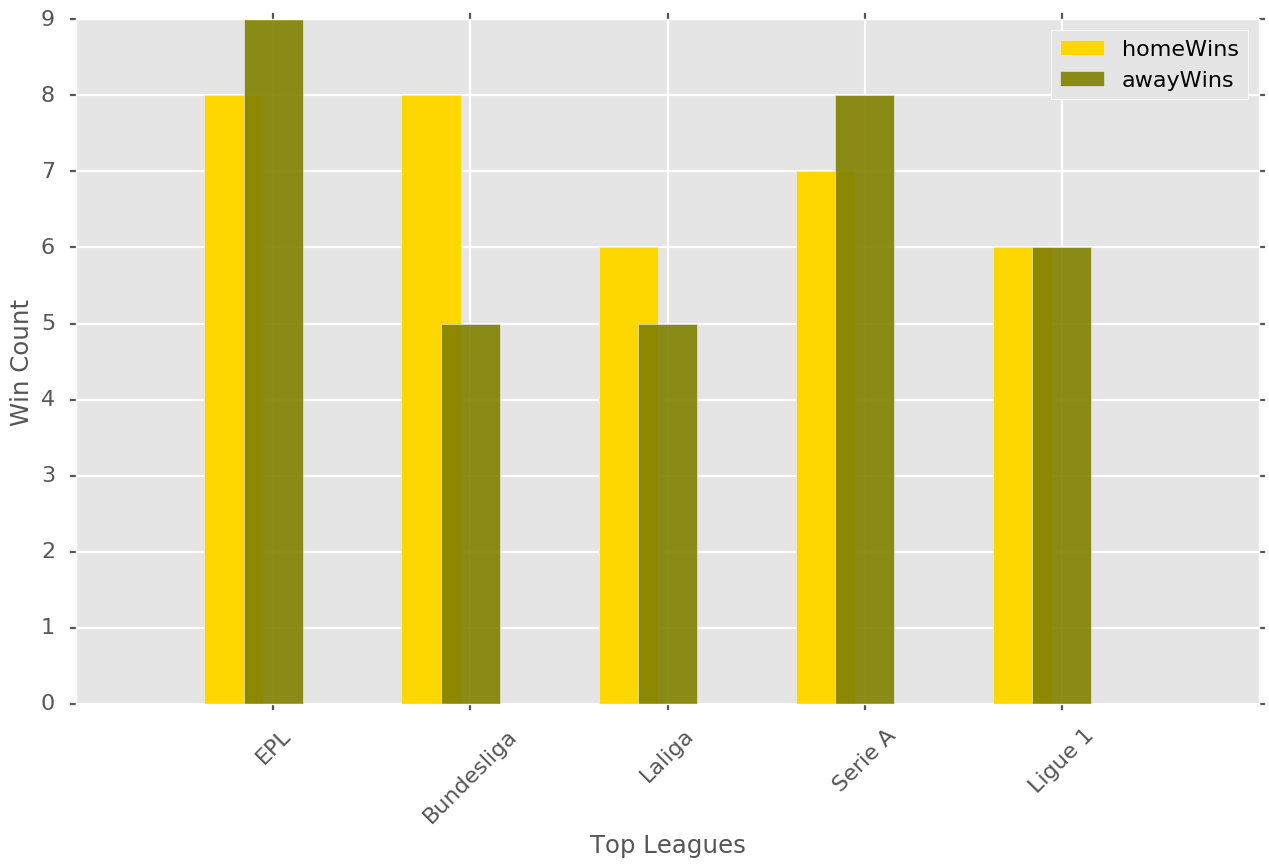

In [24]:
mp.style.use('ggplot')
mp.style.use('seaborn-dark-palette')
mp.style.use('seaborn-poster')

pos=[0.2]*5
z = mp.subplot(111)

z.bar([i - (j) for i, j in zip(x, pos)], homeWins,width=0.3,color='gold',align='center',label='homeWins')

z.bar(x, awayWins,width=0.3,color='olive',align='center',label='awayWins',alpha=.9)


mp.xticks(range(1,len(x)+1),league,rotation=45)
z.legend()

mp.ylabel('Win Count')
mp.xlabel('Top Leagues')
mp.tight_layout()
mp.show()